<a href="https://colab.research.google.com/github/Krishna260304/Autism_specturm_Screening_Adult/blob/main/Autism_specturm_Screening_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
!pip install liac-arff
from scipy.io import arff

In [ ]:
data, meta = arff.loadarff("/content/Autism-Adult-Data.arff")
df = pd.DataFrame(data)

In [ ]:
df.shape

(704, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
df["age"] = pd.to_numeric(df["age"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A1_Score"] = pd.to_numeric(df["A1_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A2_Score"] = pd.to_numeric(df["A2_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A3_Score"] = pd.to_numeric(df["A3_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A4_Score"] = pd.to_numeric(df["A4_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A5_Score"] = pd.to_numeric(df["A5_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A6_Score"] = pd.to_numeric(df["A6_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A7_Score"] = pd.to_numeric(df["A7_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A8_Score"] = pd.to_numeric(df["A8_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A9_Score"] = pd.to_numeric(df["A9_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
df["A10_Score"] = pd.to_numeric(df["A10_Score"], errors='coerce').fillna(0).astype(int)

In [ ]:
for col in df.columns :
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features :
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [1 0]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [1 0]
--------------------------------------------------
A5_Score [0 1]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [1 0]
--------------------------------------------------
A9_Score [0 1]
--------------------------------------------------
A10_Score [0 1]
--------------------------------------------------
gender [b'f' b'm']
--------------------------------------------------
ethnicity [b'White-European' b'Latino' b'?' b'Others' b'Black' b'Asian'
 b'Middle Eastern ' b'Pasifika' b'South Asian' b'Hispanic' b'Turkish'
 b'others']
--------------------------------------------------
jundice [b'no' b'yes']
-----------------------------------------

In [ ]:
df["gender"].unique()

array([b'f', b'm'], dtype=object)

In [ ]:
mapping = {b'f': 'f', b'm': 'm'}
df['gender'] = df['gender'].map(mapping)

In [ ]:
mapping = {b'yes': 'yes', b'no': 'no'}
df['jundice'] = df['jundice'].map(mapping)

In [ ]:
mapping = {b'yes': 'yes', b'no': 'no'}
df['austim'] = df['austim'].map(mapping)

In [ ]:
mapping = {b'18 and more': '18 and more'}
df['age_desc'] = df['age_desc'].map(mapping)


In [ ]:
mapping = {b'yes': 'yes', b'no': 'no'}
df['used_app_before'] = df['used_app_before'].map(mapping)

In [ ]:
mapping = {
    b'United States': 'United States',
    b'Brazil': 'Brazil',
    b'Spain': 'Spain',
    b'Egypt': 'Egypt',
    b'New Zealand': 'New Zealand',
    b'Bahamas': 'Bahamas',
    b'Burundi': 'Burundi',
    b'Austria': 'Austria',
    b'Argentina': 'Argentina',
    b'Jordan': 'Jordan',
    b'Ireland': 'Ireland',
    b'United Arab Emirates': 'United Arab Emirates',
    b'Afghanistan': 'Afghanistan',
    b'Lebanon': 'Lebanon',
    b'United Kingdom': 'United Kingdom',
    b'South Africa': 'South Africa',
    b'Italy': 'Italy',
    b'Pakistan': 'Pakistan',
    b'Bangladesh': 'Bangladesh',
    b'Chile': 'Chile',
    b'France': 'France',
    b'China': 'China',
    b'Australia': 'Australia',
    b'Canada': 'Canada',
    b'Saudi Arabia': 'Saudi Arabia',
    b'Netherlands': 'Netherlands',
    b'Romania': 'Romania',
    b'Sweden': 'Sweden',
    b'Tonga': 'Tonga',
    b'Oman': 'Oman',
    b'India': 'India',
    b'Philippines': 'Philippines',
    b'Sri Lanka': 'Sri Lanka',
    b'Sierra Leone': 'Sierra Leone',
    b'Ethiopia': 'Ethiopia',
    b'Viet Nam': 'Viet Nam',
    b'Iran': 'Iran',
    b'Costa Rica': 'Costa Rica',
    b'Germany': 'Germany',
    b'Mexico': 'Mexico',
    b'Russia': 'Russia',
    b'Armenia': 'Armenia',
    b'Iceland': 'Iceland',
    b'Nicaragua': 'Nicaragua',
    b'Hong Kong': 'Hong Kong',
    b'Japan': 'Japan',
    b'Ukraine': 'Ukraine',
    b'Kazakhstan': 'Kazakhstan',
    b'AmericanSamoa': 'AmericanSamoa',
    b'Uruguay': 'Uruguay',
    b'Serbia': 'Serbia',
    b'Portugal': 'Portugal',
    b'Malaysia': 'Malaysia',
    b'Ecuador': 'Ecuador',
    b'Niger': 'Niger',
    b'Belgium': 'Belgium',
    b'Bolivia': 'Bolivia',
    b'Aruba': 'Aruba',
    b'Finland': 'Finland',
    b'Turkey': 'Turkey',
    b'Nepal': 'Nepal',
    b'Indonesia': 'Indonesia',
    b'Angola': 'Angola',
    b'Azerbaijan': 'Azerbaijan',
    b'Iraq': 'Iraq',
    b'Czech Republic': 'Czech Republic',
    b'Cyprus': 'Cyprus'
}
df['contry_of_res'] = df['contry_of_res'].map(mapping)


In [ ]:
relation_mapping = {
    b'Self': 'Self',
    b'Parent': 'Parent',
    b'?': 'Unknown',
    b'Health care professional': 'Health care professional',
    b'Relative': 'Relative',
    b'Others': 'Others'
}
class_mapping = {
    b'NO': 'No',
    b'YES': 'Yes'
}
df['relation'] = df['relation'].map(relation_mapping)
df['Class/ASD'] = df['Class/ASD'].map(class_mapping)


In [ ]:
ethnicity_mapping = {
    b'White-European': 'White-European',
    b'Latino': 'Latino',
    b'?': '?',
    b'Others': 'Others',
    b'others': 'Others',
    b'Black': 'Black',
    b'Asian': 'Asian',
    b'Middle Eastern ': 'Middle Eastern',
    b'Pasifika': 'Pasifika',
    b'South Asian': 'South Asian',
    b'Hispanic': 'Hispanic',
    b'Turkish': 'Turkish'
}
df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)

In [ ]:
for col in df.columns :
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features :
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [1 0]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [1 0]
--------------------------------------------------
A5_Score [0 1]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [1 0]
--------------------------------------------------
A9_Score [0 1]
--------------------------------------------------
A10_Score [0 1]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern'
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish']
--------------------------------------------------
jundice ['no' 'yes']
--------------------------------------------------
austim ['no' 'yes

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
No,515
Yes,189


In [ ]:
df.shape

(704, 21)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,No
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,No
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,Yes
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,No
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,Unknown,No


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.613636,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.559686,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")

Mean Age: 29.613636363636363
Median Age: 27.0


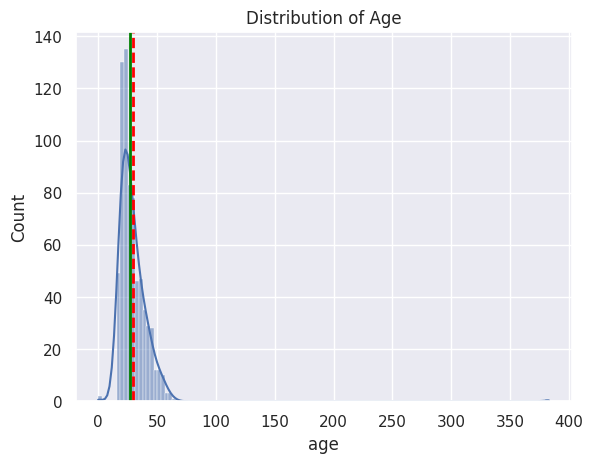

In [ ]:
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean Age:", age_mean)
print("Median Age:", age_median)

plt.axvline(age_mean, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(age_median, color='green', linestyle='-', linewidth=2, label='Median')


plt.show()

Mean Age: 4.875
Median Age: 4.0


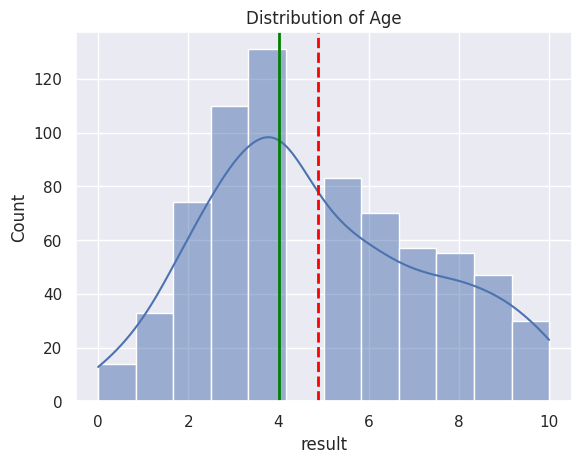

In [ ]:
sns.histplot(df["result"], kde=True)
plt.title("Distribution of Age")

result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean Age:", result_mean)
print("Median Age:", result_median)

plt.axvline(result_mean, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(result_median, color='green', linestyle='-', linewidth=2, label='Median')


plt.show()

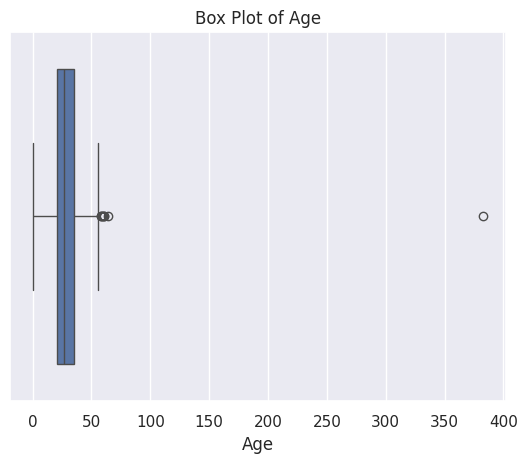

In [ ]:
sns.boxplot(x = df["age"])
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

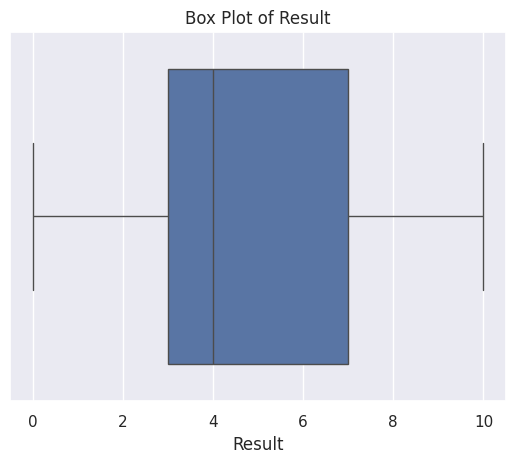

In [ ]:
sns.boxplot(x = df["result"])
plt.title("Box Plot of Result")
plt.xlabel("Result")
plt.show()

In [ ]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [ ]:
len(age_outliers)

8

In [ ]:
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [ ]:
len(result_outliers)

0

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

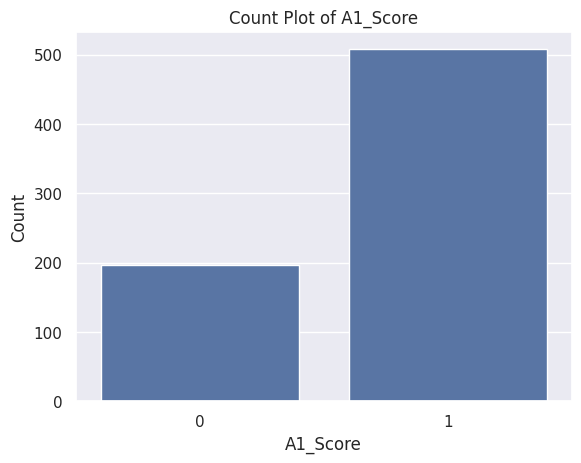

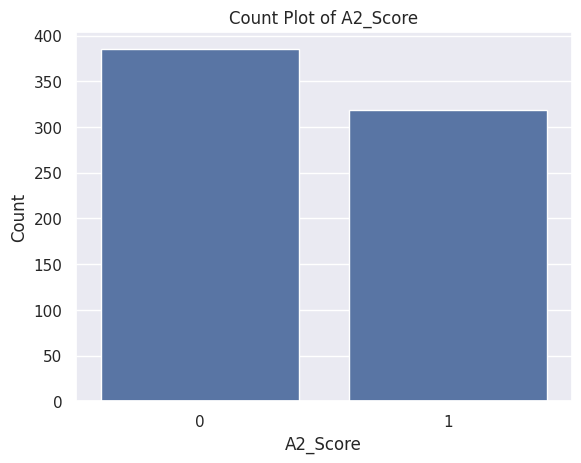

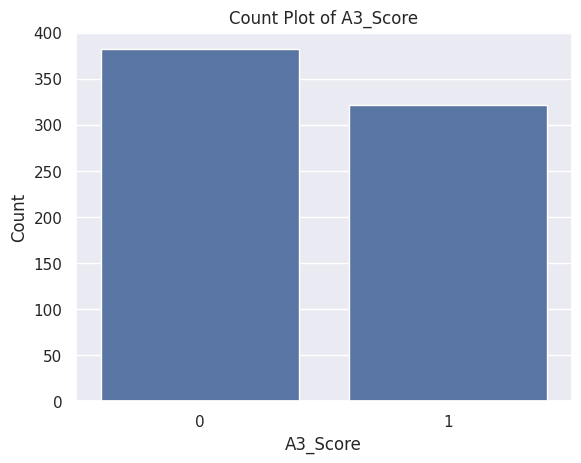

In [ ]:
catagorical_colums = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in catagorical_colums :
  sns.countplot(x = df[col])
  plt.title(f"Count Plot of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [ ]:
sns.countplot(x = df["Class/ASD"])
plt.title("Count Plot of Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [ ]:
df["ethnicity"] = df["ethnicity"].replace({"?" : "Others", "others" : "Others"})

In [ ]:
df["ethnicity"].unique()

In [ ]:
df["relation"].unique()

In [ ]:
df["relation"] = df["relation"].replace({"Unknown" : "Others",
                                         "Parent" : "Others",
                                         "Health care professional" : "Others",
                                         "Relative" : "Others"})

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
print(object_columns)

In [ ]:
encoder = {}
for col in object_columns :
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoder[col] = label_encoder

with open("encoder.pkl", "wb") as f :
  pickle.dump(encoder, f)

In [ ]:
df.drop('age_desc', axis=1, inplace=True)

In [ ]:
encoder

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def replace_outliers_with_median(df, column) :
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  df[column] = df[column].apply(lambda x : median if x < lower_bound or x > upper_bound else x)

  return df


In [ ]:
df = replace_outliers_with_median(df, "age")

df = replace_outliers_with_median(df, "result")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
x = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.value_counts())

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
cv_score = {}

for model_name , model in models.items() :
  print(f"Training {model_name} model...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
  cv_score[model_name] = scores
  print(f"{model_name} Cross-validation Accuracy : {np.mean(scores):.2f}")
  print("-"*50)

In [ ]:
cv_score

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10,20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2 ,4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

In [ ]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42)

In [ ]:
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

In [ ]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

In [ ]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score :
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score :
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score :
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_

In [ ]:
print(f"Best model : {best_model}")
print(f"Best cross-valiadtion Accuracy : {best_score}")

In [ ]:
with open("best_model.pkl", "wb") as f :
  pickle.dump(best_model, f)

In [ ]:
y_test_pred = best_model.predict(X_test)
print("Accuracy scaore : ",accuracy_score(y_test, y_test_pred))
print("Confusion matrix : \n",confusion_matrix(y_test, y_test_pred))
print("classifiaction Report : \n",classification_report(y_test, y_test_pred))